#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [156]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [157]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

Periksa apakah ada missing values

In [158]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Periksa outlier dengan boxplot untuk setiap kolom feature

<AxesSubplot:xlabel='species', ylabel='petal_width'>

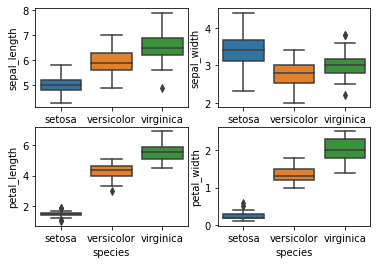

In [159]:
fig, axs = plt.subplots(2,2)
sns.boxplot(data=df, x=df["species"], y=df["sepal_length"], ax=axs[0,0])
sns.boxplot(data=df, x=df["species"], y=df["sepal_width"], ax=axs[0,1])
sns.boxplot(data=df, x=df["species"], y=df["petal_length"], ax=axs[1,0])
sns.boxplot(data=df, x=df["species"], y=df["petal_width"], ax=axs[1,1])

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [174]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [162]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [163]:
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [164]:
log_y_pred = log_classifier.predict(X_test)
print(log_y_pred)

['versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'versicolor']


In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score
log_cm = confusion_matrix(y_test, log_y_pred)
print("Confusion Matrix:\n", log_cm)
print("Log Accuracy Score: ", accuracy_score(y_test, log_y_pred))

Confusion Matrix:
 [[3 0 0]
 [0 9 0]
 [0 0 3]]
Log Accuracy Score:  1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [166]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [167]:
nb_y_pred = nb_classifier.predict(X_test)
print(nb_y_pred)

['versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [168]:
nb_cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", nb_cm)
print("Log Accuracy Score: ", accuracy_score(y_test, nb_y_pred))

Confusion Matrix:
 [[3 0 0]
 [0 9 0]
 [0 0 3]]
Log Accuracy Score:  1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [169]:
knn_classifier = KNeighborsClassifier(metric="euclidean", n_neighbors=5, p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [170]:
knn_y_pred = knn_classifier.predict(X_test)
print(knn_y_pred)

['versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [171]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix:\n", knn_cm)
print("Log Accuracy Score: ", accuracy_score(y_test, knn_y_pred))

Confusion Matrix:
 [[3 0 0]
 [0 9 0]
 [0 0 3]]
Log Accuracy Score:  1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah ketiganya, yaitu Logistic Regression, Naive Bayes, K-Nearest Neighbor dengan akurasi 1.0